In [1]:
# import mysql.connector
# from mysql.connector import Error
# import os 
# from dotenv import load_dotenv
# import pandas as pd

In [2]:
# # load env variables
# load_dotenv()

True

## Database and table creation

In [3]:
# import mysql.connector
# from mysql.connector import Error
# import os
# from dotenv import load_dotenv
# import pandas as pd

# load_dotenv()

# def create_database():
#     try:
#         conn = mysql.connector.connect(
#             host='localhost',
#             user='root',
#             password=os.getenv('MYSQL_PASS')
#         )
#         cursor = conn.cursor()
        
#         # Create database
#         cursor.execute("CREATE DATABASE IF NOT EXISTS sentiment_analysis_database")
#         cursor.execute("USE sentiment_analysis_database")
        
#         # Create single table with both raw and cleaned columns
#         cursor.execute("""
#             CREATE TABLE IF NOT EXISTS imdb_reviews (
#                 id INT AUTO_INCREMENT PRIMARY KEY,
#                 review_text TEXT NOT NULL,
#                 cleaned_text TEXT,
#                 sentiment VARCHAR(10) NOT NULL
#             )
#         """)
        
#         print("Database and table created successfully")
#         conn.commit()
        
#     except Error as e:
#         print(f"Error creating database: {e}")
#     finally:
#         if conn.is_connected():
#             cursor.close()
#             conn.close()

# def load_raw_data():
#     try:
#         conn = mysql.connector.connect(
#             host='localhost',
#             user='root',
#             password=os.getenv('MYSQL_PASS'),
#             database='sentiment_analysis_database'
#         )
#         cursor = conn.cursor()
        
#         # Load CSV data
#         csv_path = 'IMDB Dataset.csv'
#         data = pd.read_csv(csv_path)
        
#         # Insert raw data (cleaned_text will be populated later)
#         for _, row in data.iterrows():
#             cursor.execute(
#                 "INSERT INTO imdb_reviews (review_text, sentiment) VALUES (%s, %s)",
#                 (row['review'], row['sentiment'])
#             )
        
#         conn.commit()
#         print(f"Inserted {len(data)} raw reviews")
        
#     except Error as e:
#         print(f"Error loading data: {e}")
#     finally:
#         if conn.is_connected():
#             cursor.close()
#             conn.close()

# if __name__ == "__main__":
#     create_database()
#     load_raw_data()

Database and table created successfully
Inserted 50000 raw reviews


## Data Cleaning

In [4]:
# import mysql.connector
# import pandas as pd
# import re
# import string
# from dotenv import load_dotenv
# import os

# # Load environment variables
# load_dotenv()

# # Function to clean text
# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r'<br />', ' ', text)
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     return ' '.join(text.split())

# # Function to process data outside MySQL
# def process_data():
#     try:
#         # Connect to database
#         conn = mysql.connector.connect(
#             host='localhost',
#             user='root',
#             password=os.getenv('MYSQL_PASS'),
#             database='sentiment_analysis_database'
#         )
        
#         cursor = conn.cursor()

#         # Fetch raw data (only required columns)
#         query = "SELECT id, review_text, sentiment FROM imdb_reviews WHERE cleaned_text IS NULL"
#         raw_data = pd.read_sql(query, conn)

#         if raw_data.empty:
#             print("No data needing cleaning")
#             return
        
#         print(f"Fetched {len(raw_data)} rows for cleaning...")

#         # Clean text
#         raw_data['cleaned_text'] = raw_data['review_text'].astype(str).apply(clean_text)

#         # Remove duplicates based on cleaned_text and sentiment
#         cleaned_data = raw_data.drop_duplicates(subset=['cleaned_text', 'sentiment'])

#         print(f"Removed {len(raw_data) - len(cleaned_data)} duplicate rows")

#         # Batch update cleaned_text into MySQL
#         update_query = "UPDATE imdb_reviews SET cleaned_text = %s WHERE id = %s"
#         update_values = [(row['cleaned_text'], row['id']) for _, row in cleaned_data.iterrows()]
        
#         cursor.executemany(update_query, update_values)
#         conn.commit()

#         print(f"Updated {len(cleaned_data)} cleaned reviews into MySQL")

#     except mysql.connector.Error as e:
#         print(f"Error processing data: {e}")
#         conn.rollback()
#     finally:
#         if conn.is_connected():
#             cursor.close()
#             conn.close()

# if __name__ == "__main__":
#     process_data()


C:\Users\Gaurab Parajuli\AppData\Local\Temp\ipykernel_16152\913639268.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  raw_data = pd.read_sql(query, conn)


Fetched 50000 rows for cleaning...
Removed 423 duplicate rows
Updated 49577 cleaned reviews into MySQL


## Train Model

In [6]:
# import mysql.connector
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score
# import pickle
# from dotenv import load_dotenv
# import os

# load_dotenv()

# def load_clean_data():
#     try:
#         conn = mysql.connector.connect(
#             host='localhost',
#             user='root',
#             password=os.getenv('MYSQL_PASS'),
#             database='sentiment_analysis_database'
#         )
        
#         data = pd.read_sql(
#             "SELECT cleaned_text, sentiment FROM imdb_reviews",
#             conn
#         )
#         return data
        
#     except Error as e:
#         print(f"Error loading data: {e}")
#     finally:
#         conn.close()

# def train_and_save_model():
#     data = load_clean_data()
#     data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
    
#     # Train/test split
#     X_train, X_test, y_train, y_test = train_test_split(
#         data['cleaned_text'], data['sentiment'], test_size=0.2, random_state=42
#     )
    
#     # Vectorization
#     vectorizer = TfidfVectorizer(max_features=5000)
#     X_train_vec = vectorizer.fit_transform(X_train)
#     X_test_vec = vectorizer.transform(X_test)
    
#     # Model training
#     model = LogisticRegression(max_iter=1000)
#     model.fit(X_train_vec, y_train)
    
#     # Evaluation
#     preds = model.predict(X_test_vec)
#     print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
#     print(f"F1 Score: {f1_score(y_test, preds):.4f}")
    
#     # Save artifacts
#     with open('model.pkl', 'wb') as f:
#         pickle.dump(model, f)
    
#     with open('vectorizer.pkl', 'wb') as f:
#         pickle.dump(vectorizer, f)
    
#     print("Model and vectorizer saved")

# if __name__ == "__main__":
#     train_and_save_model()

In [23]:
import mysql.connector
from mysql.connector import Error
import os 
from dotenv import load_dotenv
import pandas as pd

#import regular expression 
import re
import string 

In [24]:
# load env variables
load_dotenv()

True

In [25]:
def create_database():
    try:
        conn = mysql.connector.connect(
            host='localhost',
            user='root',
            password=os.getenv('MYSQL_PASS')
        )
        cursor = conn.cursor()
        
        # Create database
        cursor.execute("CREATE DATABASE IF NOT EXISTS sentiment_analysis_database")
        cursor.execute("USE sentiment_analysis_database")
        
        # Create single table with both raw and cleaned columns
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS imdb_reviews (
                id INT AUTO_INCREMENT PRIMARY KEY,
                review_text TEXT NOT NULL,
                sentiment VARCHAR(10) NOT NULL
            )
        """)
        
        print("Database and table created successfully")
        conn.commit()
        
    except Error as e:
        print(f"Error creating database: {e}")
    finally:
        if conn.is_connected():
            cursor.close()
            conn.close()

create_database()

Database and table created successfully


In [26]:
def load_raw_data():
    try:
        conn = mysql.connector.connect(
            host='localhost',
            user='root',
            password=os.getenv('MYSQL_PASS'),
            database='sentiment_analysis_database'
        )
        cursor = conn.cursor()
        
        # Load CSV data
        csv_path = 'IMDB Dataset.csv'
        data = pd.read_csv(csv_path)
        
        # Insert raw data (cleaned_text will be populated later)
        for _, row in data.iterrows():
            cursor.execute(
                "INSERT INTO imdb_reviews (review_text, sentiment) VALUES (%s, %s)",
                (row['review'], row['sentiment'])
            )
        
        conn.commit()
        print(f"Inserted {len(data)} raw reviews")
        
    except Error as e:
        print(f"Error loading data: {e}")
    finally:
        if conn.is_connected():
            cursor.close()
            conn.close()

if __name__ == "__main__":
    load_raw_data()

Inserted 50000 raw reviews


C:\Users\Gaurab Parajuli\AppData\Local\Temp\ipykernel_16152\2250627759.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Loaded 50000 records from the database
Removed 0 rows with null values
Removed 418 duplicate rows
Cleared existing data from the table
Uploaded 49582 cleaned records to the database


C:\Users\Gaurab Parajuli\AppData\Local\Temp\ipykernel_16152\2250627759.py:84: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Loaded 49582 records from the database
Number of reviews per sentiment:
sentiment
positive    24884
negative    24698
Name: count, dtype: int64
Average review length for each sentiment:
sentiment
negative    1229.476354
positive    1263.754139
Name: review_length, dtype: float64


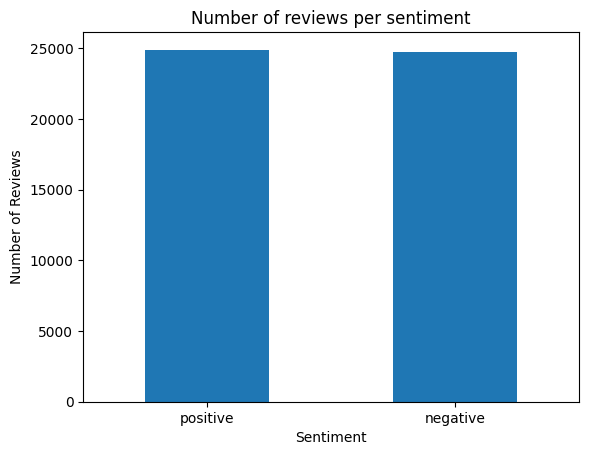

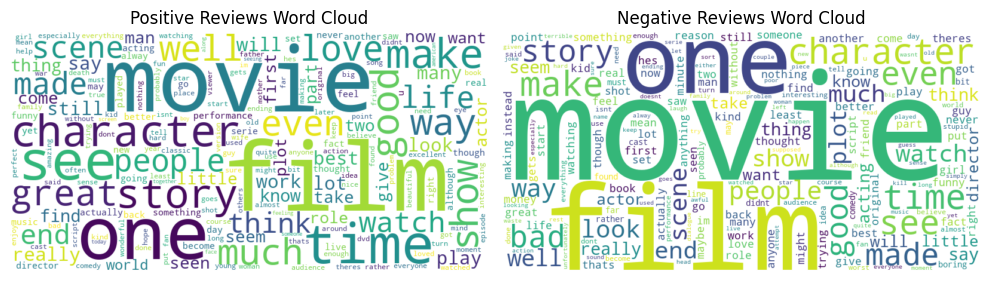

In [27]:
import mysql.connector
import pandas as pd
import re
import string
from dotenv import load_dotenv
import os

load_dotenv()

def clean_text(text):
    """Clean and preprocess the text."""
    text = text.lower()
    text = re.sub(r'<br\s*/?>', ' ', text)  # Remove HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return ' '.join(text.split())  # Remove extra whitespace

def clean_and_update_data():
    """Clean the data using pandas and update the database."""
    try:
        # Step 1: Connect to the database
        conn = mysql.connector.connect(
            host='localhost',
            user='root',
            password=os.getenv('MYSQL_PASS'),
            database='sentiment_analysis_database'
        )

        # Step 2: Fetch all data into a pandas DataFrame
        query = "SELECT id, review_text, sentiment FROM imdb_reviews"
        df = pd.read_sql(query, conn)

        print(f"Loaded {len(df)} records from the database")

        # Step 3: Clean the data
        # Remove rows with null values
        df = df.dropna(subset=['review_text', 'sentiment'])
        print(f"Removed {len(df) - df.dropna().shape[0]} rows with null values")

        # Remove duplicates
        initial_count = len(df)
        df = df.drop_duplicates(subset=['review_text', 'sentiment'])
        print(f"Removed {initial_count - len(df)} duplicate rows")

        # Clean the review text
        df['review_text'] = df['review_text'].apply(clean_text)

        # Step 4: Clear the existing table and upload cleaned data
        cursor = conn.cursor()

        # Clear the table
        cursor.execute("DELETE FROM imdb_reviews")
        print("Cleared existing data from the table")

        # Upload cleaned data
        for _, row in df.iterrows():
            cursor.execute(
                "INSERT INTO imdb_reviews (review_text, sentiment) VALUES (%s, %s)",
                (row['review_text'], row['sentiment'])
            )

        conn.commit()
        print(f"Uploaded {len(df)} cleaned records to the database")

    except Error as e:
        print(f"Error processing data: {e}")
        conn.rollback()
    finally:
        if conn.is_connected():
            cursor.close()
            conn.close()

def performing_eda():
    try:
        # Step 1: Connect to the database
        conn = mysql.connector.connect(
            host='localhost',
            user='root',
            password=os.getenv('MYSQL_PASS'),
            database='sentiment_analysis_database'
        )

        # Step 2: Fetch all data into a pandas DataFrame
        query = "SELECT id, review_text, sentiment FROM imdb_reviews"
        df = pd.read_sql(query, conn)

        print(f"Loaded {len(df)} records from the database")

        # i.
        # Number of reviews per sentiment (distribution)
        # (It means, what is the number of positive and negative reviews by sentiment. Positive sentiment has how many review and Negative Sentiment has how many review.)

        # count the number of reviews per sentiment
        sentiment_counts = df['sentiment'].value_counts()
        # print the results 
        print("Number of reviews per sentiment:")
        print(sentiment_counts)


        # ii.
        # Average Review Length for Positive vs Negative Sentiment
        # (It means how long is the review for positive sentiment and how long is the review for negative sentiment in the review_text)
         
        # Calculate the length of each review
        df['review_length'] = df['review_text'].apply(len)

        # Calculate average review length for each sentiment
        avg_length_sentiment = df.groupby('sentiment')['review_length'].mean()

        # print the results
        print("Average review length for each sentiment:")
        print(avg_length_sentiment)

         # iii. 
        # Somme simple plots or word clouds can be included for illustration

        # plots
        # Plotting number of reviews per sentiment
        # (BarPlot)

        import matplotlib.pyplot as plt 

        sentiment_counts.plot(kind='bar')
        plt.title("Number of reviews per sentiment")
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=0)
        plt.show()


        # Word cloud for Positive and Negative Reviews 
        from wordcloud import WordCloud 

        positive_reviews = df[df['sentiment'] == 'positive']['review_text']

        negative_reviews = df[df['sentiment'] == 'negative']['review_text']

        # Join all reviews to create a single string for each sentiment
        positive_text = ' '.join(positive_reviews)

        negative_text = ' '.join(negative_reviews) 


        # Generate word clouds
        positive_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

        negative_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

        # Plot the word clouds
        plt.figure(figsize=(10,8))

        # Positive word cloud
        plt.subplot(1,2,1)
        plt.imshow(positive_word_cloud, interpolation='bilinear')
        plt.title('Positive Reviews Word Cloud')
        plt.axis('off')

        # Negative Word Cloud
        plt.subplot(1,2,2)
        plt.imshow(negative_word_cloud, interpolation='bilinear')
        plt.title("Negative Reviews Word Cloud")
        plt.axis('off')

        plt.tight_layout()
        plt.show()




    except Error as e:
        print(f"Error processing data: {e}")
        conn.rollback()
    finally:
        if conn.is_connected():
            conn.close()

if __name__ == "__main__":
    clean_and_update_data()
    performing_eda()


In [31]:

# 3. part
# 3. Model Training 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pickle

try:
    # Step 1: Connect to the database
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password=os.getenv('MYSQL_PASS'),
        database='sentiment_analysis_database'
    )

    # Step 2: Fetch all data into a pandas DataFrame
    query = "SELECT id, review_text, sentiment FROM imdb_reviews"
    data = pd.read_sql(query, conn)

    print(f"Loaded {len(data)} records from the database")

except Error as e:
    print(f"Error processing data: {e}")
    conn.rollback()
finally:
    if conn.is_connected():
        conn.close()



# For Model Training we are using Logistic Regression 

# Encode sentiment labels as binary i.e.(1=positive and 0=negative)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Train/Test/Validation Split

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(data['review_text'],data['sentiment'],test_size=0.2,random_state=42)

# Additional Split from training set for validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Applying TF-IDF on training data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.fit_transform(X_val)
X_test_tfidf = vectorizer.fit_transform(X_test)



# Training

# Fit the model on the training data using Logistic Regression 
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Monitor basic metrics on the validation set
# For that, Evaluate the model on the validation set 
y_val_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1_score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



# Evaluation 

# Evaluate on test set
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_f1 = f1_score(y_test,y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("Test Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1_score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

# save the trained model using a pickle file 
with open('logistic_regression_tfidf.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open("Vectorizer.pkl", 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model saved as logistic_regression_tfidf.pkl file sucessfully.")
print("Model saved as Vectorizer.pkl file sucessfully.")


C:\Users\Gaurab Parajuli\AppData\Local\Temp\ipykernel_16152\521662312.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


Loaded 49582 records from the database
Validation Metrics:
Accuracy: 0.5487
F1_score: 0.4039
Precision: 0.5854
Recall: 0.3083
Test Metrics:
Accuracy: 0.5407
F1_score: 0.5703
Precision: 0.5376
Recall: 0.6073
Model saved as logistic_regression_tfidf.pkl file sucessfully.
Model saved as Vectorizer.pkl file sucessfully.
